In [1]:
#parameter 
mesh_sizes = [100]

In [2]:
from sectionproperties.pre.library.steel_sections import mono_i_section
from sectionproperties.analysis.section import Section
from sectionproperties.pre.library.steel_sections import mono_i_section
import sectionproperties.pre.library.primitive_sections as sections
import sectionproperties.pre.library.steel_sections as steel_sections
from sectionproperties.pre.geometry import CompoundGeometry
from sectionproperties.pre.pre import Material
from sectionproperties.analysis.section import Section

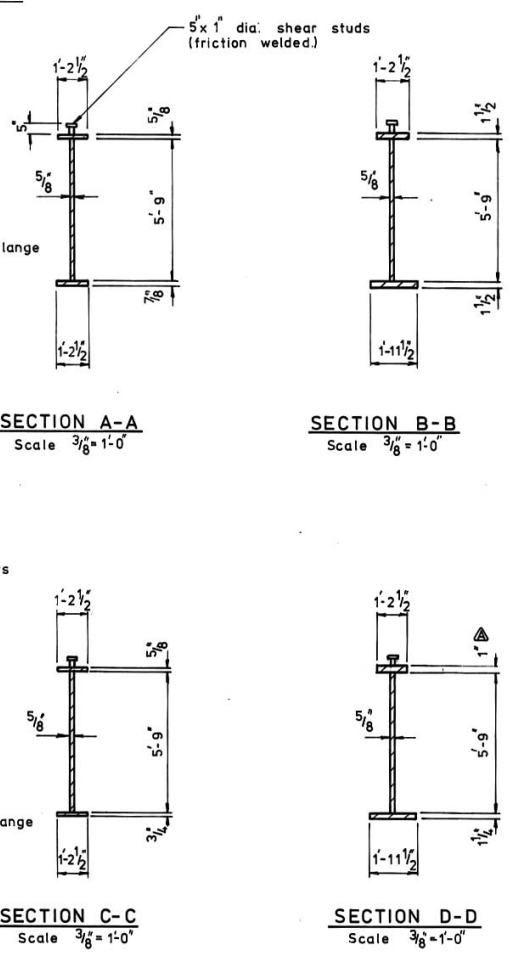

In [3]:
#display longitudinal section dimension 
from IPython.display import Image
Image(filename =r'C:\Users\DARA\Desktop\4th year\fyp\L1.PNG', width= 200)

In [ ]:
Image(filename =r'C:\Users\DARA\Desktop\4th year\fyp\LongB.PNG', width = 200)

In [ ]:
#not in use at the moment
#Longitudinal member 
geometryA1 = mono_i_section(
    d=200, b_t=50, b_b=130, t_ft=12, t_fb=8, t_w=6, r=8, n_r=16
)
geometryA1.create_mesh(mesh_sizes)
LongitudinalA1 = Section(geometryA1)
LongitudinalA1.plot_mesh()
#section = Section(geometry)
#LongitudinalA1.display_mesh_info()
LongitudinalA1.calculate_geometric_properties()
#LongitudinalA1.display_results(fmt='.3f')

In [ ]:
#not in use at the moment
geometryA2 = mono_i_section(
    d=1752.6, b_t=368.3, b_b=596.9, t_ft=38.1, t_fb=38.1, t_w=15.875, r=0, n_r=0
)
geometryA2.create_mesh(mesh_sizes)
LogitudinalA2 = Section(geometryA2)
(area, ixx, iyy, ixy, j, phi) = LogitudinalA2.calculate_frame_properties()

In [ ]:
#not in use at the moment
geometryA3 = mono_i_section(
    d=1752.6, b_t=368.3, b_b=368.3, t_ft=15.875, t_fb=19.05, t_w=15.875, r=0, n_r=0
)
geometryA3.create_mesh(mesh_sizes)
LogitudinalA3 = Section(geometryA3)
(area, ixx, iyy, ixy, j, phi) = LogitudinalA3.calculate_frame_properties()

In [ ]:
#not in use at the moment
geometryA4 = mono_i_section(
    d=1752.6, b_t=368.3, b_b=596.9, t_ft=25.4, t_fb=31.75, t_w=15.875, r=0, n_r=0
)
geometryA4.create_mesh(mesh_sizes)
LogitudinalA4 = Section(geometryA4)
(area, ixx, iyy, ixy, j, phi) = LogitudinalA4.calculate_frame_properties()

In [ ]:
#not in use at the moment
#beamB1 = beamB2
geometryB1= mono_i_section(
    d=1752.6, b_t=368.3, b_b=368.3, t_ft=15.875, t_fb=22.225, t_w=15.875, r=0, n_r=0
)
geometryB1.create_mesh(mesh_sizes)
LogitudinalB1 = Section(geometryB1)
(area, ixx, iyy, ixy, j, phi) = LogitudinalB1.calculate_frame_properties()

In [ ]:
#not in use at the moment
#beamB3 = beamB4
geometryB3= mono_i_section(
    d=1752.6, b_t=368.3, b_b=368.3, t_ft=15.875, t_fb=19.05, t_w=15.875, r=0, n_r=0
)
geometryB3.create_mesh(mesh_sizes)
LogitudinalB3 = Section(geometryB3)
(area, ixx, iyy, ixy, j, phi) = LogitudinalB3.calculate_frame_properties()

In [ ]:
#logitudinal edge beam


In [4]:
#transerverse Slab
from sectionproperties.pre.library.primitive_sections import rectangular_section
transverse_slab = rectangular_section(d=190, b=900)
transverse_slab.create_mesh(mesh_sizes=[mesh_sizes])
Transverse_slab = Section(transverse_slab)
(Tran_slab_area,Tran_slab_ixx, Tran_slab_iyy,Tran_slab_ixy,Tran_slab_j, phi) = Transverse_slab.calculate_frame_properties()

In [5]:
#end transerverse slab
end_slab = rectangular_section(d=190, b=900/2)
end_slab.create_mesh(mesh_sizes=[mesh_sizes])
End_slab = Section(end_slab)
(End_slab_area,End_slab_ixx, End_slab_iyy,End_slab_ixy,End_slab_j, phi) = End_slab.calculate_frame_properties()

In [6]:
#material 
steel = Material(
    name="Steel",
    elastic_modulus=200e3,
    poissons_ratio=0.3,
    yield_strength=500,
    density=8.05e-6,
    color="grey",
)
concrete = Material(
    name="concrete",
    elastic_modulus=30e3,
    poissons_ratio=0.2,
    yield_strength=350,
    density=2.4e-6,
    color="burlywood",
)


In [7]:
#composite section 
I_beam = mono_i_section(
    d=1752.6, b_t=368.3, b_b=596.9, t_ft=38.1, t_fb=38.1, t_w=15.875, r=0, n_r=0
)
panel = sections.rectangular_section(d=190, b=1000, material=concrete)
panel = panel.align_center(I_beam).align_to(I_beam, on="top")
# Create intermediate nodes in panel to match nodes in ub
panel = (panel - I_beam) | panel

section_geometry = CompoundGeometry([I_beam, panel])
section_geometry.create_mesh(mesh_sizes=[30, 30])
comp_section = Section(section_geometry, time_info=True)
comp_section.display_mesh_info()  # display the mesh information

--Initialising the Section class...
----completed in 0.192756 seconds---

Mesh Statistics:
--28285 nodes
--13646 elements
--2 regions



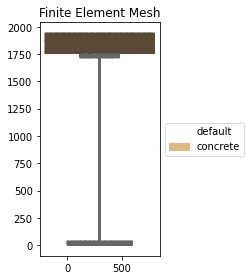

<AxesSubplot:title={'center':'Finite Element Mesh'}>

In [7]:
comp_section.plot_mesh(materials=True, alpha=0.6)

In [8]:
#comp_section.calculate_geometric_properties()
(comp_section_area, comp_section_ixx, comp_section_iyy,comp_section_ixy,comp_section_j,phi) = comp_section.calculate_frame_properties()


--Calculating frame section properties...
--Initialising the Section class...
----completed in 0.167999 seconds---

----completed in 85.875306 seconds---



In [9]:
import numpy as np
import ospgrillage as og

# Adopted units: N and m
kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
MPa = N / ((mm) ** 2)
GPa = kilo * MPa

# define material
concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")

# define sections (parameters from section property calculation)
edge_longitudinal_section = og.create_section(
    A=0.934 * m2,
    J=0.1857 * m3,
    Iz=0.3478 * m4,
    Iy=0.213602 * m4,
    Az=0.444795 * m2,
    Ay=0.258704 * m2,
)

longitudinal_section = og.create_section(
    A= comp_section_area*10**-6 * m2,
    J= comp_section_j*10**-9 * m3,
    Iz = comp_section_ixx*10**-12 * m4,
    Iy= comp_section_iyy*10**-12* m4,
    Az= comp_section_area*10**-6 * m2,
    Ay= comp_section_area*10**-6 * m2,
)

transverse_section = og.create_section(
    A= Tran_slab_area*10**-6 * m2,
    J= Tran_slab_j*10**-9* m3,
    Iy= Tran_slab_iyy*10**-12* m4,
    Iz= Tran_slab_ixx*10**-12* m4,
    Ay= Tran_slab_area*10**-6* m2,
    Az= Tran_slab_area*10**-6* m2,
)

end_transverse_section = og.create_section(
    A=End_slab_area*10**-6 * m2,
    J= End_slab_j*10**-9 * m3,
    Iy=End_slab_iyy*10**-12 * m4,
    Iz=End_slab_ixx*10**-12 * m4,
    Ay=End_slab_area*10**-6 * m2,
    Az=End_slab_area*10**-6 * m2,
)

# define grillage members
longitudinal_beam = og.create_member(section=longitudinal_section, material=concrete)
edge_longitudinal_beam = og.create_member(
    section=edge_longitudinal_section, material=concrete
)
transverse_slab = og.create_member(section=transverse_section, material=concrete)
end_transverse_slab = og.create_member(
    section=end_transverse_section, material=concrete
)


# parameters of bridge grillage
L = 84 * m  # span
w = 13 * m  # width
n_l = 7  # number of longitudinal members
n_t = 14  # number of transverse members
edge_dist = 0.9 * m  # distance between edge beam and first exterior beam
angle = 0  # skew angle
offset_beam_y = 0.499 * m
max_mesh_size_z = 1 * m
max_mesh_size_x = 1 * m
link_nodes_width = 0.89 * m
transverse_spacing = [6.09, 6.09,6.09,6.83,6.89,6.9,5.9,6.9,6.92,6.8,6.09,6.09,6.09]
multi_span = [25.22, 33.56, 25.22]
# create grillage
simple_grid = og.create_grillage(
    bridge_name="Banksia st",
    long_dim=L,
    width=w,
    skew=angle,
    num_long_grid=n_l,
    num_trans_grid=n_t,
    edge_beam_dist=edge_dist,
    model_type="shell_beam",
    max_mesh_size_z=max_mesh_size_z,
    max_mesh_size_x=max_mesh_size_x,
    offset_beam_y_dist=offset_beam_y,
    link_nodes_width=link_nodes_width,
    beam_width = 0.445 ,
    multi_span_dist_list= multi_span,
    beam_x_spacing = transverse_spacing
)

# assign grillage member to element groups of grillage model
simple_grid.set_member(longitudinal_beam, member="interior_main_beam")
simple_grid.set_member(longitudinal_beam, member="exterior_main_beam_1")
simple_grid.set_member(longitudinal_beam, member="exterior_main_beam_2")
simple_grid.set_member(edge_longitudinal_beam, member="edge_beam")
simple_grid.set_member(transverse_slab, member="transverse_slab")
#simple_grid.set_member(end_transverse_slab, member="start_edge")
#simple_grid.set_member(end_transverse_slab, member="end_edge")

# create the model in OpenSees
simple_grid.create_osp_model(
    pyfile=False
)  # pyfile will not (False) be generated for further analysis (should be create_osp?)
#og.opsplt.plot_model("nodes")  # plotting using Get_rendering
og.opsv.plot_model(az_el=(-90, 0),fig_wi_he=(20., 20.))  # plotting using ops_vis
#og.plt.show()

<IPython.core.display.Javascript object>

Lxyz: [0.     0.     0.6775], L: 0.6775
Lxyz: [0.    0.    0.445], L: 0.44500000000000006
Lxyz: [0.    0.    0.785], L: 0.7849999999999997
Lxyz: [0.    0.    0.785], L: 0.7850000000000001
Lxyz: [0.    0.    0.785], L: 0.7849999999999997
Lxyz: [0.    0.    0.445], L: 0.4450000000000003
Lxyz: [0.    0.    0.785], L: 0.7849999999999997
Lxyz: [0.    0.    0.785], L: 0.7850000000000001
Lxyz: [0.    0.    0.785], L: 0.7850000000000001
Lxyz: [0.    0.    0.445], L: 0.4450000000000003
Lxyz: [0.    0.    0.785], L: 0.7849999999999993
Lxyz: [0.    0.    0.785], L: 0.7849999999999993
Lxyz: [0.    0.    0.785], L: 0.7850000000000001
Lxyz: [0.    0.    0.445], L: 0.4450000000000003
Lxyz: [0.    0.    0.785], L: 0.7850000000000001
Lxyz: [0.    0.    0.785], L: 0.7850000000000001
Lxyz: [0.    0.    0.785], L: 0.7850000000000001
Lxyz: [0.    0.    0.445], L: 0.4450000000000003
Lxyz: [0.     0.     0.6775], L: 0.6775000000000002
Lxyz: [6.46153846 0.         0.        ], L: 6.461538461538462
Lxyz: [6.46

In [18]:
#Load_test_z= [0 , 0.9, 3.71, 6.52, 9.33, 12.1, 13 ]
point_load_location = og.create_load_vertex(x=42,y=0, z=6.5, p=20)  # create load point
point_load = og.create_load(loadtype="point",name="single point", point1=point_load_location)
simple_grid.analyze()
results = simple_grid.get_results()
print(results)

WARNING BandGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 6
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 1
OpenSees > analyze failed, returned: -3 error flag


ValueError: different number of dimensions on data and dims: 2 vs 3

In [14]:
lane_point_1 = og.create_load_vertex(x=42, y=0, z=3, p=5)
lane_point_2 = og.create_load_vertex(x=42, y=0, z=3, p=5)
lane_point_3 = og.create_load_vertex(x=45, y=0, z=5, p=5)
lane_point_4 = og.create_load_vertex(x=45, y=0, z=5, p=5)
Lane = og.PatchLoading(
    point1=lane_point_1,
    point2=lane_point_2,
    point3=lane_point_3,
    point4=lane_point_4,
)
ULS_DL = og.LoadCase(name="Lane")
ULS_DL.add_load(Lane)  # ch
simple_grid.add_load_case(ULS_DL)
simple_grid.analyze()

results = simple_grid.get_results()
print(results)

WARNING BandGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 6
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 1
OpenSees > analyze failed, returned: -3 error flag


ValueError: different number of dimensions on data and dims: 2 vs 3

In [13]:
simple_grid.analyze()

In [28]:
lane_point_1 = og.create_load_vertex(x=42, y=0, z=0, p=5)
lane_point_2 = og.create_load_vertex(x=42, y=0, z=0.9, p=5)
lane_point_3 = og.create_load_vertex(x=42, y=0, z=6.52, p=5)
lane_point_4 = og.create_load_vertex(x=42, y=0, z=9.33, p=5)
Lane = og.PatchLoading(
    point1=lane_point_1,
    point2=lane_point_2,
    point3=lane_point_3,
    point4=lane_point_4,
)
ULS_DL = og.LoadCase(name="Lane")
ULS_DL.add_load(Lane)  # ch
simple_grid.add_load_case(ULS_DL)
simple_grid.analyze()

results = simple_grid.get_results()
print(results)

ValueError: Invalid inputs.